In [22]:
import matplotlib.pyplot as plt

In [38]:
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
wine_dataset = loadmat('datasets/wine.mat')

In [39]:
wine_dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 19:04:02 2016',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.329e+01, 1.970e+00, 2.680e+00, ..., 1.070e+00, 2.840e+00,
         1.270e+03],
        [1.430e+01, 1.920e+00, 2.720e+00, ..., 1.070e+00, 2.650e+00,
         1.280e+03],
        [1.368e+01, 1.830e+00, 2.360e+00, ..., 1.230e+00, 2.870e+00,
         9.900e+02],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]

In [40]:
import pandas as pd

X = pd.DataFrame(data = wine_dataset['X'], columns = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'])
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0
1,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
2,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
3,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
4,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
125,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
126,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
127,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [41]:
Y = pd.DataFrame(data = wine_dataset['y'], columns = ['target'])
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
124,0
125,0
126,0
127,0


In [42]:
# Check for data type of each feature

print(X.dtypes)

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                       float64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                         float64
dtype: object


In [43]:
# Check for missing values

print(X.isna().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


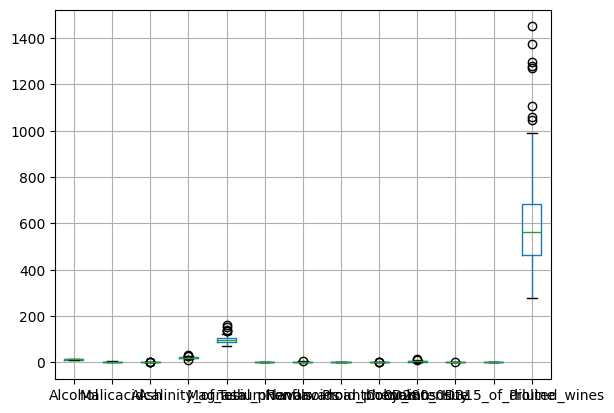

In [44]:
# Try boxplot of each feature to find outliers

X.boxplot()
plt.show()

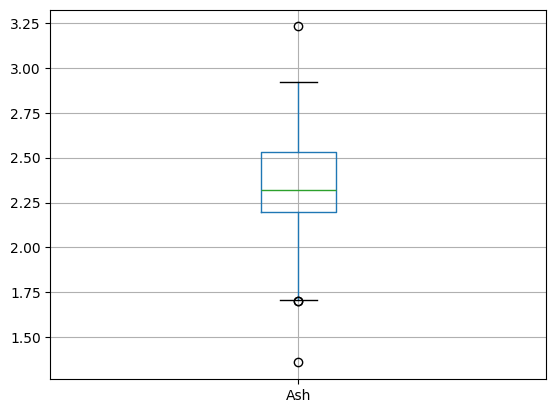

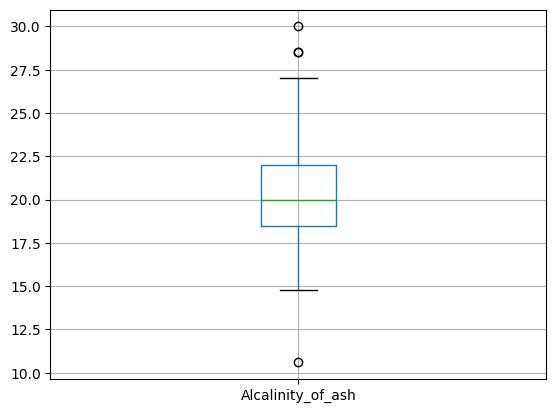

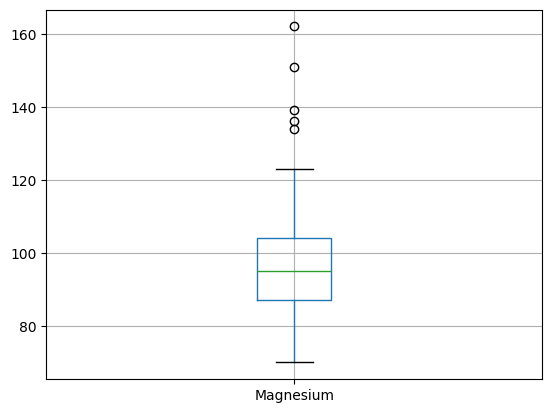

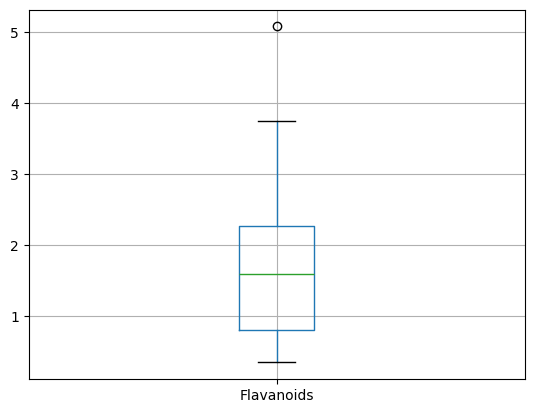

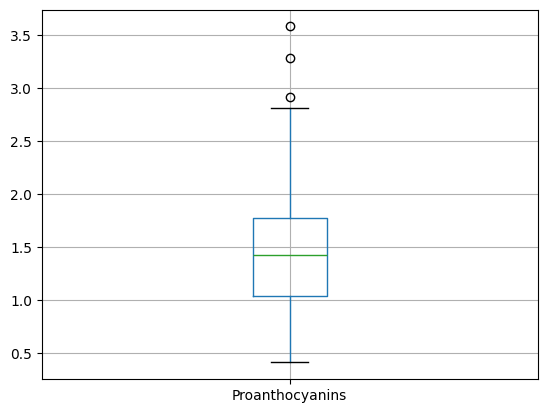

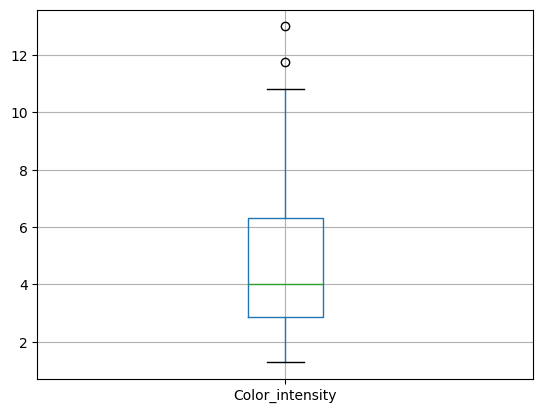

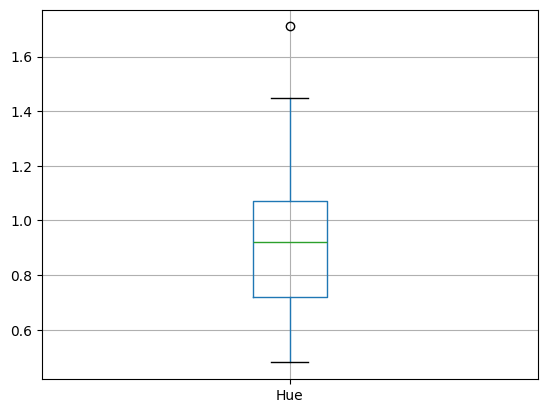

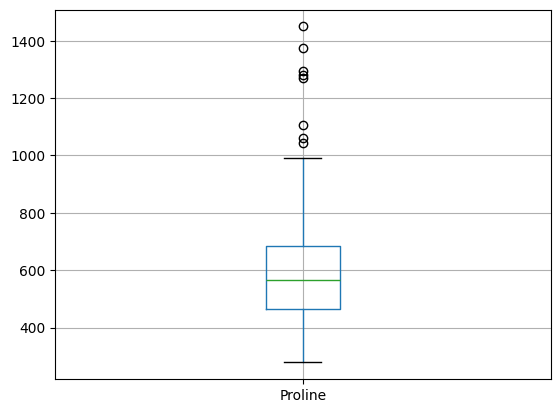

In [45]:
# Closer look at features where outliers are present

for col in ["Ash", "Alcalinity_of_ash", "Magnesium", "Flavanoids", "Proanthocyanins", "Color_intensity", "Hue", "Proline"]:
    X.boxplot(col)
    plt.show()

In [55]:
# Based on boxplots, key features to determine outliers are Ash, Alcalinity_of_ash, Magnesium, Proanthocyanins, Proline

from scipy.stats import zscore
X = X.apply(zscore)
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,0.761266,-0.393311,1.223624,-1.201407,0.308389,1.570168,1.733511,-0.639755,0.337093,0.424613,0.614699,0.655693,2.929142
1,2.125387,-0.434655,1.366021,-0.147783,1.528286,1.225604,1.633961,-0.482558,0.880216,0.501957,0.614699,0.378367,2.973665
2,1.288006,-0.509074,0.084445,-1.069704,0.443933,0.570934,1.136210,0.224828,0.880216,-0.410703,1.264867,0.699481,1.682523
3,1.801240,-0.244474,0.974429,-0.938001,1.596058,0.881041,0.937109,-0.639755,-0.381232,0.057229,0.574063,1.735804,3.040448
4,2.017338,-0.616568,-0.129151,-1.366035,1.392742,1.914731,1.479105,-1.032747,0.985337,0.571567,0.086437,1.341709,1.593478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.328524,2.649596,0.404839,0.016846,-0.166015,-0.703951,-1.164506,1.010813,-0.714115,1.082038,-1.132628,-0.949878,0.569469
125,0.909833,1.210830,0.511637,0.839989,0.308389,-0.497213,-1.009650,0.303427,-0.100910,0.927349,-0.888815,-1.212607,0.613991
126,0.734253,1.516775,-0.271548,-0.147783,1.528286,-0.859005,-1.076017,0.303427,-0.206031,2.048838,-1.335806,-1.212607,0.992429
127,0.599192,0.119352,0.120044,-0.147783,1.528286,-0.755636,-1.087078,1.089411,-0.013310,1.700790,-1.295170,-1.125031,1.014691


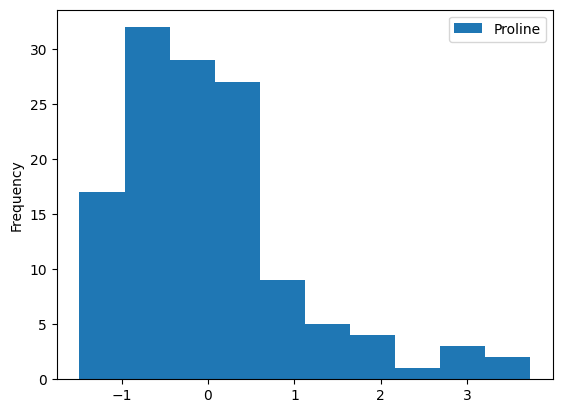

In [62]:
X.plot.hist(column = "Proline")
plt.show()